In [2]:
import subprocess
import pandas as pd
import numpy as np
import warnings

# Function to run the experiment and capture output
def run_experiment(extadj, rate, file, topk):
    command = [
        "python", "main.py",
        f"--importextadj={extadj}",
        f"--privacy_amplify_sampling_rate={rate}",
        "--data_file=data/cora_ml",
        f"--extadjfile={file}",
        f"--topk={topk}"
    ]

    result = subprocess.run(command, capture_output=True, text=True, encoding='utf-8')

    output = result.stdout
    accuracy = None
    for line in output.splitlines()[-10:]:
        if "Testing accuracy" in line:
            try:
                accuracy = float(line.split(":")[1].strip())
            except ValueError:
                accuracy = None
            break

    return accuracy


In [7]:
#default dpar, random node sampling
topk_values = [2, 4, 6, 8]
runs = 1
means_default = []
stds_default = []

for topk in topk_values:
    accuracies = []
    for _ in range(runs):
        acc = run_experiment(extadj=True, rate=1, file='ext_sampled_adj/truerandom10pct.npz', topk=topk)
        accuracies.append(acc)
    m = np.mean(accuracies)
    s = np.std(accuracies)
    means_default.append(m)
    stds_default.append(s)
    print(f"Topk {topk}: mean accuracy = {m:.4f}, std = {s:.4f}")


Topk 2: mean accuracy = 0.7771, std = 0.0000
Topk 4: mean accuracy = 0.8080, std = 0.0000
Topk 6: mean accuracy = 0.7895, std = 0.0000
Topk 8: mean accuracy = 0.7864, std = 0.0000


Testing for Forest fire based sampling:

Topk 2: mean accuracy = 0.2446, std = 0.0000
Topk 4: mean accuracy = 0.2786, std = 0.0000
Topk 6: mean accuracy = 0.2724, std = 0.0000
Topk 8: mean accuracy = 0.2570, std = 0.0000


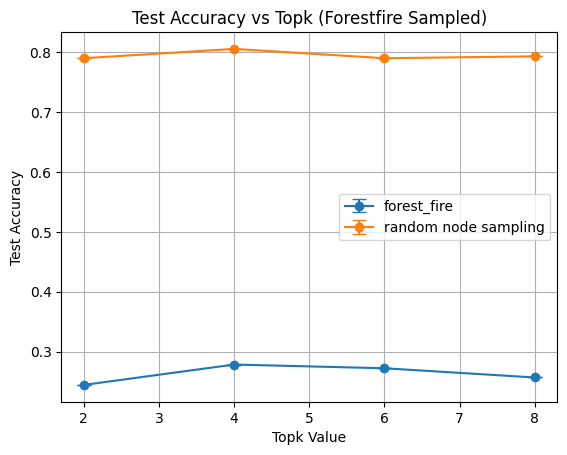

In [17]:
import matplotlib.pyplot as plt

means_forest = []
std_forest = []
stats_forest = []

for topk in topk_values:
    accuracies = []
    for _ in range(runs):
        acc = run_experiment(extadj=True, rate=1, file='ext_sampled_adj/forestfire10pct.npz', topk=topk)
        accuracies.append(acc)
    m = np.mean(accuracies)
    s = np.std(accuracies)
    means_forest.append(m)
    std_forest.append(s)
    print(f"Topk {topk}: mean accuracy = {m:.4f}, std = {s:.4f}")

plt.errorbar(topk_values, means_forest, yerr=std_forest, fmt='-o', capsize=5, label = 'forest_fire')
plt.errorbar(topk_values, means_default, yerr=stds_default, fmt='-o', capsize=5, label = 'random node sampling')
plt.xlabel('Topk Value')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Topk (Forestfire Sampled)')
plt.grid(True)
plt.legend()
plt.show()

Random Walk Sampled

Topk 2: mean accuracy = 0.2539, std = 0.0000
Topk 4: mean accuracy = 0.2353, std = 0.0000
Topk 6: mean accuracy = 0.2384, std = 0.0000
Topk 8: mean accuracy = 0.2693, std = 0.0000


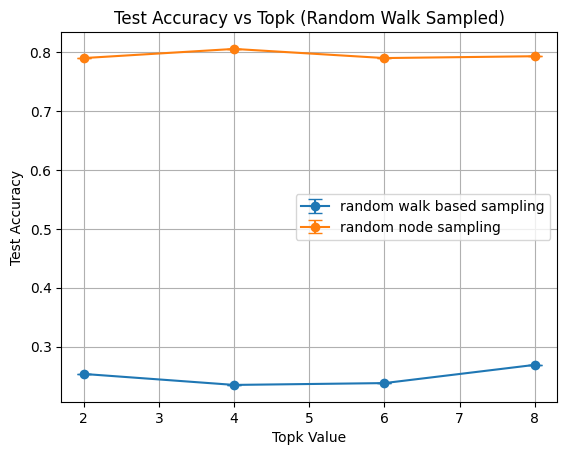

In [19]:
means_randomwalk = []
std_randomwalk = []
topk_values = [2, 4, 6, 8]
runs = 1

for topk in topk_values:
    accuracies = []
    for _ in range(runs):
        acc = run_experiment(extadj=True, rate=1, file='ext_sampled_adj/randomwalk10pct.npz', topk=topk)
        accuracies.append(acc)
    m = np.mean(accuracies)
    s = np.std(accuracies)
    means_randomwalk.append(m)
    std_randomwalk.append(s)
    print(f"Topk {topk}: mean accuracy = {m:.4f}, std = {s:.4f}")

plt.errorbar(topk_values, means_randomwalk, yerr=std_randomwalk, fmt='-o', capsize=5, label = 'random walk based sampling')
plt.errorbar(topk_values, means_default, yerr=stds_default, fmt='-o', capsize=5, label = 'random node sampling')
plt.xlabel('Topk Value')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Topk (Random Walk Sampled)')
plt.grid(True)
plt.legend()
plt.show()

Common Neighbour

Topk 2: mean accuracy = 0.4737, std = 0.0000
Topk 4: mean accuracy = 0.5325, std = 0.0000
Topk 6: mean accuracy = 0.4799, std = 0.0000
Topk 8: mean accuracy = 0.5170, std = 0.0000


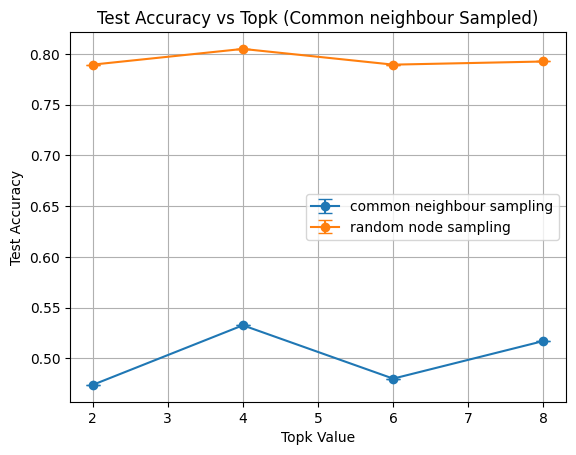

In [20]:
means_commonneigh = []
std_commonneigh = []

for topk in topk_values:
    accuracies = []
    for _ in range(runs):
        acc = run_experiment(extadj=True, rate=1, file='ext_sampled_adj/commonneighbour10pct.npz', topk=topk)
        accuracies.append(acc)
    m = np.mean(accuracies)
    s = np.std(accuracies)
    means_commonneigh.append(m)
    std_commonneigh.append(s)
    print(f"Topk {topk}: mean accuracy = {m:.4f}, std = {s:.4f}")

plt.errorbar(topk_values, means_commonneigh, yerr=std_commonneigh, fmt='-o', capsize=5, label= 'common neighbour sampling')
plt.errorbar(topk_values, means_default, yerr=stds_default, fmt='-o', capsize=5, label = 'random node sampling')
plt.xlabel('Topk Value')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Topk (Common neighbour Sampled)')
plt.grid(True)
plt.legend()
plt.show()

Frontier Sampling

Topk 2: mean accuracy = 0.6192, std = 0.0000
Topk 4: mean accuracy = 0.5573, std = 0.0000
Topk 6: mean accuracy = 0.5418, std = 0.0000
Topk 8: mean accuracy = 0.5604, std = 0.0000


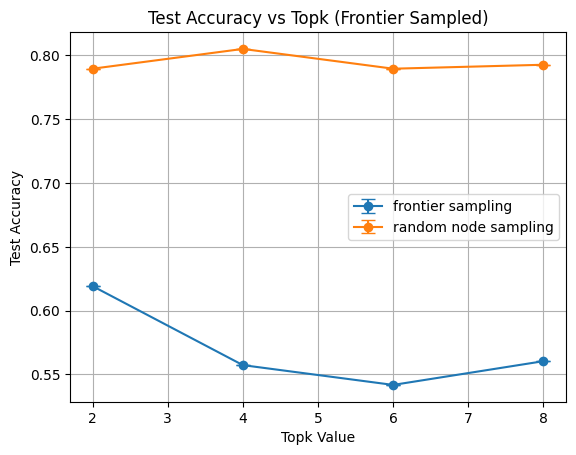

In [22]:
means_frontier = []
std_frontier = []
topk_values = [2, 4, 6, 8]
runs = 1

for topk in topk_values:
    accuracies = []
    for _ in range(runs):
        acc = run_experiment(extadj=True, rate=1, file='ext_sampled_adj/frontier10pct.npz', topk=topk)
        accuracies.append(acc)
    m = np.mean(accuracies)
    s = np.std(accuracies)
    means_frontier.append(m)
    std_frontier.append(s)
    print(f"Topk {topk}: mean accuracy = {m:.4f}, std = {s:.4f}")

plt.errorbar(topk_values, means_frontier, yerr=std_frontier, fmt='-o', capsize=5, label ='frontier sampling')
plt.errorbar(topk_values, means_default, yerr=stds_default, fmt='-o', capsize=5, label = 'random node sampling')
plt.xlabel('Topk Value')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Topk (Frontier Sampled)')
plt.grid(True)
plt.legend()
plt.show()

Spiky ball sampling, at its root is Multi Source BFS based sampling

In [24]:
means_spiky = []
std_spiky = []
topk_values = [2, 4, 6, 8]
runs = 1

for topk in topk_values:
    accuracies = []
    for _ in range(runs):
        acc = run_experiment(extadj=True, rate=1, file='ext_sampled_adj/spiky.npz', topk=topk)
        accuracies.append(acc)
    m = np.mean(accuracies)
    s = np.std(accuracies)
    means_spiky.append(m)
    std_spiky.append(s)
    print(f"Topk {topk}: mean accuracy = {m:.4f}, std = {s:.4f}")

Topk 2: mean accuracy = 0.6223, std = 0.0000
Topk 4: mean accuracy = 0.5975, std = 0.0000
Topk 6: mean accuracy = 0.6347, std = 0.0000
Topk 8: mean accuracy = 0.6161, std = 0.0000


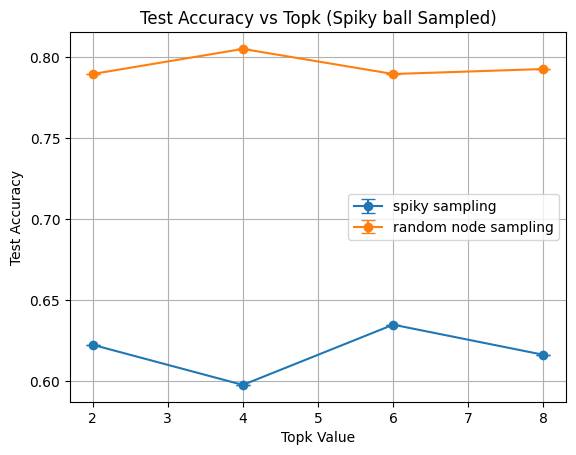

In [25]:
import matplotlib.pyplot as plt

plt.errorbar(topk_values, means_spiky, yerr=std_spiky, fmt='-o', capsize=5, label ='spiky sampling')
plt.errorbar(topk_values, means_default, yerr=stds_default, fmt='-o', capsize=5, label = 'random node sampling')
plt.xlabel('Topk Value')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Topk (Spiky ball Sampled)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#hypothesis is that the reason random sampling works is because there is a inherent class imbalance in the other sampling techniques
import matplotlib.pyplot as plt
import numpy as np

def hist_from_subgraph(file,ax):
    smth = np.load(file)
    train_labels = (np.load('matricx.npz')['train_labels'])[smth['train_labels']]

    a, b = np.unique(train_labels, return_counts=True)
    ax.bar(a, b, color = np.random.choice(range(256), size=3)/256)
    ax.set_title(file.split('/')[-1].split('.')[0])
    ax.set_ylim([0,80])
    ax.set_xlabel('Classes')
    ax.set_ylabel('Number of nodes')

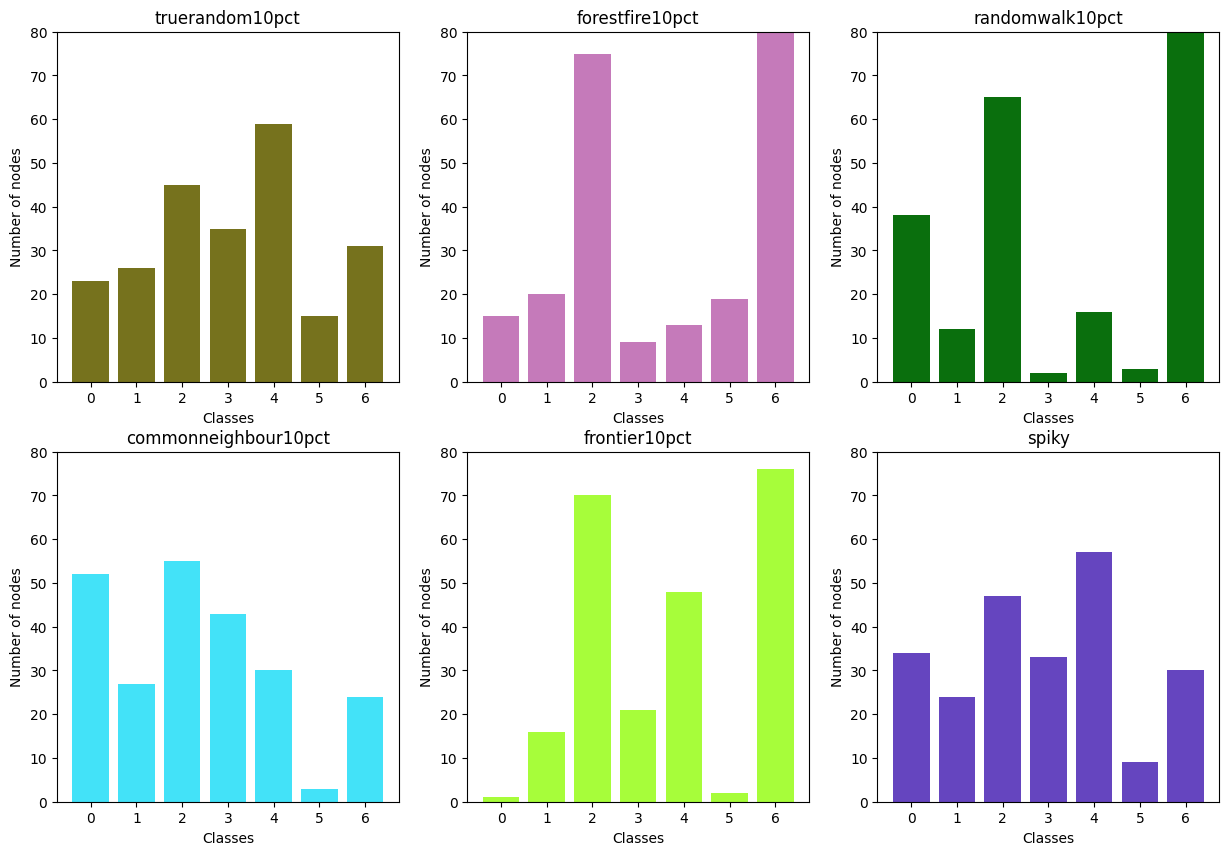

In [ ]:
#use the hist_from subgraph function to plot the histogram of the class imbalance in the different sampling techniques
fig,ax = plt.subplots(2,3,figsize=(15,10))
hist_from_subgraph('ext_sampled_adj/truerandom10pct.npz',ax[0,0])
hist_from_subgraph('ext_sampled_adj/forestfire10pct.npz',ax[0,1])
hist_from_subgraph('ext_sampled_adj/randomwalk10pct.npz',ax[0,2])
hist_from_subgraph('ext_sampled_adj/commonneighbour10pct.npz',ax[1,0])
hist_from_subgraph('ext_sampled_adj/frontier10pct.npz',ax[1,1])
hist_from_subgraph('ext_sampled_adj/spiky.npz',ax[1,2])

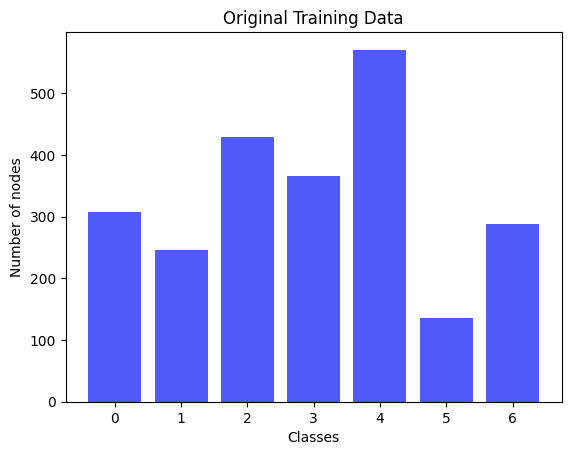

In [ ]:
fig1, ax1 = plt.subplots()
labels = np.load('matricx.npz')['train_labels']
a, b = np.unique(labels, return_counts=True)
ax1.bar(a, b, color = np.random.choice(range(256), size=3)/256)
ax1.set_title('Original Training Data')
ax1.set_xlabel('Classes')
ax1.set_ylabel('Number of nodes')
plt.show()

In [6]:
#testing by picking same number of nodes from each class for training

topk_values = [2, 4, 6, 8]
runs = 1
means_uniform = []
stds_uniform = []

for topk in topk_values:
    accuracies = []
    for _ in range(runs):
        acc = run_experiment(extadj=True, rate=1, file = "NA", topk=topk)
        accuracies.append(acc)
    m = np.mean(accuracies)
    s = np.std(accuracies)
    means_uniform.append(m)
    stds_uniform.append(s)
    print(f"Topk {topk}: mean accuracy = {m:.4f}, std = {s:.4f}")


Topk 2: mean accuracy = 0.7864, std = 0.0000
Topk 4: mean accuracy = 0.7833, std = 0.0000
Topk 6: mean accuracy = 0.7926, std = 0.0000
Topk 8: mean accuracy = 0.7647, std = 0.0000


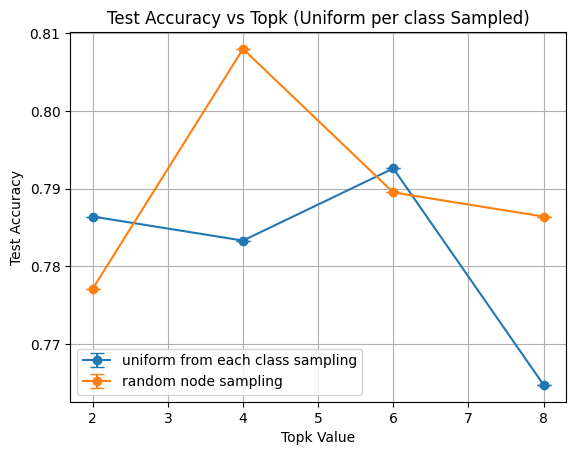

In [13]:
import matplotlib.pyplot as plt

plt.errorbar(topk_values, means_uniform, yerr=stds_uniform, fmt='-o', capsize=5, label ='uniform from each class sampling')
plt.errorbar(topk_values, means_default, yerr=stds_default, fmt='-o', capsize=5, label = 'random node sampling')
plt.xlabel('Topk Value')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Topk (Uniform per class Sampled)')
plt.grid(True)
plt.legend()
plt.show()